# Exploring the jobs of Wellesley CS alums on Linkedin

Author: Andrea Mock

The following notebook details the distribution of start dates of Wellesley CS alums and when they first joined their current employer. In the first step the start year is cleaned and extracted and then subsequently plotted using matplotlib.

In [1]:
import pandas as pd

In [2]:
# read in the data
df = pd.read_csv("jobs.csv", index_col = 0)

## Part 1: Extracting start and end date 
Our dataset contains a column (years) that details the start and end date of the current employement of a Wellesley alumna. However, since the start and end date is in string format, we first split it to extract both the start and end date and convert it to a datetime object for further processing.

In [4]:
# example of one of the date entries
df['years'][2]

'Aug 2020 – Present'

In [5]:
def splitDate(dateString):
    """
    splits a date that is in string format into start and end date
    """
    if type(dateString) == str:
        return dateString.split('–') # split element is - 
    return ['','']

In [6]:
# extract start dates
df['start'] = df['years'].apply(lambda x: splitDate(x)[0])

In [7]:
# extract end dates
df['end'] = df['years'].apply(lambda x: splitDate(x)[-1])

In [85]:
#df.head()

After having created two columns, one for the start dates and another for the end dates we want to convert these dates to actual datetime object to allow for comparison.

In [9]:
from dateutil.parser import parse

# example of how to parse a string to extract the date
dt = parse('2013')
print(dt)
# datetime.datetime(2010, 2, 15, 0, 0)
print(dt.strftime('%m/%Y'))

2013-12-10 00:00:00
12/2013


In [10]:
from datetime import date

today = date.today()

# dd/mm/YY
d1 = today.strftime("%d/%m/%Y")


In [11]:
def parseDate(dateStr):
    """
    parses a date in string format and converts it to a datetime object
    """
    date_clean = dateStr.strip()
    if date_clean == "Present":
        today = date.today()
        day = today.strftime('%m/%Y')
        return day
    elif len(date_clean) == 0:
        return ''
    else: 
        dt = parse(date_clean)
        return dt.strftime('%m/%Y')

In [12]:
# convert end dates to datetime 
df['end_clean'] = df['end'].apply(lambda x: parseDate(x))

In [13]:
# convert start dates to datetime 
df['start_clean'] = df['start'].apply(lambda x: parseDate(x))

In [14]:
df['end_clean'][0] # example of a cleaned date

'06/2020'

## Part 2: Cleaning the current jobs 
Our current dataset includes alums who might have just recently graduated or might have failed to update their employer, thus still stating that they work at Wellesley as a tutor for example. To avoid skewing the results of our employer analysis we will first filter and clean the alum entries that have listed Wellesley as their current employer.

In [15]:
# create a column that has a true false indicator of current company is Wellesley
df['company_1'] = df['company'].apply(lambda x: x == 'Wellesley College') 

In [86]:
#df

In [17]:
def splitHeadline(headline):
    if type(headline) == str:
        if len(headline.split('@')) == 1:
               return headline.split(' at')
        elif len(headline.split('@')) == 2 :
            return headline.split('@')
    return ['','']

In [18]:
df['comp_clean1'] = df['headline'].apply(lambda x: splitHeadline(x)[0])
df['comp_clean2'] = df['headline'].apply(lambda x: splitHeadline(x)[-1])

In [20]:
subdata = df[df['company_1'] == True]

In [87]:
#subdata.head() # extracting all alums that have Wellesley listed as their current company

In [88]:
# filter data where current company is Wellesley but headline includes a different company name
#s1 = subdata[~(subdata['comp_clean2'].apply(lambda x:x.strip()) == subdata['company'])]
#s1.head()

In [58]:
s1 = s1.drop(['title','company'], axis = 1)
s1.rename(columns={'comp_clean1': 'title', 'comp_clean2': 'company'}, inplace=True)

In [61]:
s1 = s1.reindex(columns=['headline', 'name', 'title', 'company','location', 'years', 'description', 'url', 'start',
       'end', 'end_clean', 'start_clean', 'company_1'])

In [89]:
#s1.head()

In [90]:
s2 = subdata[(subdata['comp_clean2'].apply(lambda x:x.strip()) == subdata['company'])]
#s2.head()

In [45]:
def filterProfessors(row):
    """
    returns false if the word professor is mentioned in a particular alums title
    """
    if 'Professor' in row['title']:
        return False
    return True

In [46]:
# only keep the alums that are actual alums (not professors at wellesley who mistakenly appear in our dataset)
s2 = s2[s2.apply(filterProfessors, axis = 1)]

In [91]:
# merge datasets that were cleaned individually
merged_sub = pd.concat([s1, s2])
#merged_sub.head()

In [65]:
# other part of dataset where Wellesley was not current employer
part1 = df[df['company_1'] == False]

In [66]:
# merge back together dataset that had individuals first listing wellesley as current employers and other alums
df_clean = pd.concat([merged_sub, part1])

In [67]:
# get rid of unnecessary columns created solely for cleaning purposes
df_clean = df_clean.reset_index(drop=True)
df_clean = df_clean.drop(['start','end','company_1', 'comp_clean1','comp_clean2'], axis=1)
df_clean

In [70]:
# save cleaned dataframe to a csv file
df_clean.to_csv('job_info.csv')

## Part 3: Visualizing graduation years
After having cleaned the data, we can now move on to visualizing the date. We are interested in exploring when alums first joined their current employer. The first step is to create a dataframe that only includes the start dates and the number of times that particular start date occurs. Sort the dataframe and then using matplotlib create a plot. 

In [ ]:
from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
start_df = pd.DataFrame([df['start_clean'].value_counts().index, df['start_clean'].value_counts()]).T
start_df.columns = ['start_date', 'counts']

In [77]:
# create dataframe that has start date sorted for a nicer visualization
sorted_starts = start_df.sort_values('start_date')
sorted_starts = sorted_starts.reset_index(drop=True)

In [84]:
sorted_starts

,start_date,counts
0,,6
1,01/1995,1
2,01/1999,1
3,01/2012,1
4,01/2013,4
...,...,...
112,12/2016,2
113,12/2017,3
114,12/2018,8
115,12/2019,12


In [ ]:
# drop counts for those alums with no start date
sorted_noNA = sorted_starts.drop([sorted_starts.index[0]])

In [81]:
# convert dates to years only for easier visualization
sorted_noNA['start_date'] = sorted_noNA['start_date'].apply(lambda x: parser.parse(x).year)

Text(0, 0.5, 'count')

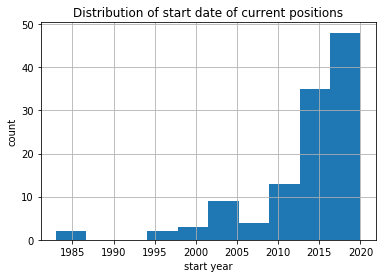

In [82]:
# plotting number of alums and when they started at their current position
sorted_noNA.hist()
plt.title('Distribution of start date of current positions')
plt.xlabel('start year')
plt.ylabel('count')